# 本节大纲

1. 版本介绍，5分钟
2. 嵌入模型选型，25分钟
3. 向量数据库选型，25分钟
4. 大语言模型选型，25分钟
5. 数据工程，25分钟
6. 答疑和总结，15分钟

In [49]:
!pip install openai openai[datalib] scikit-learn matplotlib embaas

  Obtaining dependency information for embaas from https://files.pythonhosted.org/packages/b9/c1/2a60b335adc29ba111fe099e77156b298b0a8d936352faa26164907c7ed3/embaas-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for httpx from https://files.pythonhosted.org/packages/33/0d/d9ce469af019741c8999711d36b270ff992ceb1a0293f73f9f34fdf131e9/httpx-0.25.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic from https://files.pythonhosted.org/packages/73/66/0a72c9fcde42e5650c8d8d5c5c1873b9a3893018020c77ca8eb62708b923/pydantic-2.4.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 6.2 MB/s eta 0:00:00
  Obtaining dependency information for httpcore<0.19.0,>=0.18.0 from https://files.pythonhosted.org/packages/ac/97/724afbb7925339f6214bf1fdb5714d1a462690466832bf8fb3fd497649f1/httpcore-0.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for annotated-types>=0.4.0 from https://files.pythonhosted.org/packages/

### Embedding Model Selection

In [ ]:
# 在前两节课程中，我们讲述了 Embedding 究竟是怎样一回事？
# 但是有众多的 Embedding Model，我该如何选？

![s1](./resource/images/s1_embedding_model_selection.png)

![s2](./resource/images/s2_embedding_model_selection.png)

![s3](./resource/images/s3_embedding_model_selection.png)

![s4](./resource/images/s4_embedding_model_selection.png)

![s5](./resource/images/s5_embedding_model_selection.png)

![s6](./resource/images/s6_embedding_model_selection.png)

In [127]:
# 先来回顾下文本向量化的过程
import openai

def text_embedding(input):
    response = openai.Embedding.create(
      model="text-embedding-ada-002",
      input=input
    )
    
    output = []
    for item in response['data']:
        output.append(item['embedding'])
        
    return output

In [128]:
# 原始文本
sentences = [ "你好", "早上好", "中午好", "晚上好",
             "小盖是谁", "小盖是墨问西东最帅的男人。", 
             "瑶瑶是墨问西东的颜值担当，遥遥领先。",
             "这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。"]

# 类别标签 
labels = [0, 0, 0, 0, 1, 1, 2, 3] 

# 向量化
vectors = text_embedding(sentences)

In [44]:
print(f'一共有 {len(vectors) } 个向量，每一个向量的维度都是 {len(vectors[0])}')

一共有 8 个向量，每一个向量的维度都是 1536


In [45]:
# 先把向量从 1536维 变成 3 维
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_transformed = pca.fit_transform(vectors)

In [46]:
print(f'原来的维度是 {len(vectors[0])}，现在的维度是 {data_transformed.shape[1]}')

原来的维度是 1536，现在的维度是 3


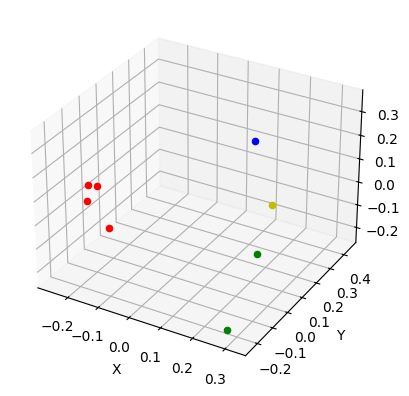

In [47]:
# 可视化下三维情况下的向量空间
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i in range(len(data_transformed)):
    ax.scatter(data_transformed[i, 0], data_transformed[i, 1],
    data_transformed[i, 2], c=colors[labels[i]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [48]:
# 以上只是我们从单一角度去判断模型好和坏，那么如何用更加具体的方式来评估呢

# 是否开源
# 是否可商用
# 法律法规
# 输入的模态
# 支持语言
# 模型大小
# 推理速度
# 算力开销
# 输入的令牌个数
# 输出的向量维度
# 测试任务表现
# 实际业务表现

#### License

In [ ]:
# 数据集
# 训练代码
# 模型权重

#### Benchmark

In [ ]:
# Embedding Model Leader Board
# MTEB 包含 8 个任务的 56 个数据集

# Paper:       https://arxiv.org/pdf/2210.07316.pdf
# Blog:        https://huggingface.co/blog/mteb
# Github:      https://github.com/embeddings-benchmark/mteb
# HuggingFace: https://huggingface.co/spaces/mteb/leaderboard

![MTEB_LeaderBoard](./resource/images/MTEB_LeaderBoard.png)

#### Embedding As A Service

In [ ]:
# 另外一种行业趋势，提供在线的文本嵌入能力 API，不需要用户部署任何模型
# https://embaas.io/

### Vector Database Selection

In [ ]:
# 在之前已经学会了 CURD 去操作向量数据库
# 但是还有一些关键指标需要熟悉，才能更好去洞察每一个不同点

![s1](./resource/images/s1_vector_database_selection.png)

![s2](./resource/images/s2_vector_database_selection.png)

![s3](./resource/images/s3_vector_database_selection.png)

In [ ]:
# 向量数据库排行榜
# https://db-engines.com/en/ranking/vector+dbms

![VectorDatabase_Ranking](./resource/images/VectorDatabase_Ranking.png)

In [ ]:
# 影响到选择的一些因素

# 文档的数量
# 向量的维度 
# 相似度的计算方式
# 字段索引类型
# 字段数据类型
# 标量/向量/混合查询
# 副本、分片支持
# 分布式部署

#### 相似度的计算方式

In [ ]:
# 为了表达出向量与向量之间的相似度情况
# 就好像通过外表穿着打扮来评估是哪一个地域/国家的人
# https://milvus.io/docs/v2.0.x/metric.md

![Similarity_Algorithm](./resource/images/Similarity_Algorithm.png)

In [116]:
# L2 (Euclidean Distance)
# 两点间的直线距离

import numpy as np

vec1 = np.array([2, 5])
vec2 = np.array([6, 1])

d = np.linalg.norm(vec1-vec2, ord=2)
# 或者
d = np.sqrt(np.sum(np.square(vec1-vec2)))
d

5.656854249492381

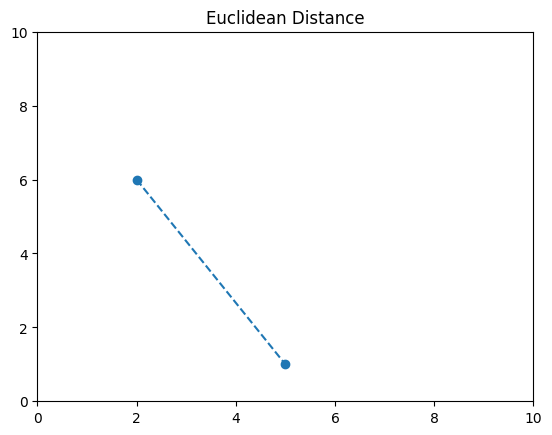

In [117]:
x = vec1
y = vec2

plt.scatter(x, y)
plt.plot(x, y, linestyle='dashed')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Euclidean Distance')
plt.show()

In [118]:
# IP (Inner Product)
# 两个向量的内积除以两个向量长度的乘积

vec1 = np.array([2, 5])
vec2 = np.array([6, 1])

d = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
d

0.5189781342417641

In [122]:
# COS (Cosine Similarity)
import numpy as np

vec1 = np.array([2, 5])
vec2 = np.array([6, 1])

p = np.dot(vec1,vec2)/(np.linalg.norm(vec1)*(np.linalg.norm(vec2)))
p

0.5189781342417641

In [101]:
# 角度还原
np.arccos(d) * 180 / np.pi

58.736268305622566

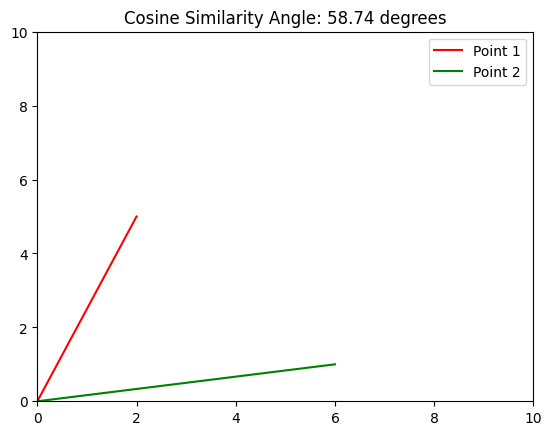

In [124]:
point1 = vec1
point2 = vec2

angle = np.arccos(np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2)))

plt.plot([point1[0], 0], [point1[1], 0], 'r-', label='Point 1')
plt.plot([point2[0], 0], [point2[1], 0], 'g-', label='Point 2')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Cosine Similarity Angle: {:.2f} degrees'.format(np.degrees(angle)))  # 标题显示角度的度数

plt.legend()
plt.show()

In [ ]:
# 直角坐标系在线演示
# https://www.desmos.com/

#### 字段数据类型

In [ ]:
# https://milvus.io/docs/v2.0.x/schema.md

#### 字段索引类型

In [ ]:
# https://milvus.io/docs/v2.0.x/index.md

#### 标量/向量/混合查询

In [ ]:
# https://milvus.io/docs/v2.0.x/search.md
# https://milvus.io/docs/v2.0.x/query.md
# https://milvus.io/docs/v2.0.x/hybridsearch.md

### Large Language Model Selection

In [132]:
# 选择大语言模型参考要素：

# 是否开源
# 是否可商用
# 输入的模态
# 输出的模态
# 支持语言
# 模型大小
# 推理速度
# 算力开销
# 输入的令牌个数
# 测试任务表现
# 实际业务表现

#### Leader Board

In [ ]:
# OpenCompass 大语言模型排行榜
# https://opencompass.org.cn/leaderboard-llm

# HuggingFace 大语言模型排行榜
# https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard
 
# C-Eval 中文大模型评估排行榜
# https://cevalbenchmark.com/static/leaderboard_zh.html

# SuperCLUE 中文通用大模型综合性基准
# https://github.com/CLUEbenchmark/SuperCLUE

#### Model As A Service

In [130]:
# 另外一种行业趋势，提供开源的语言模型在线 API，不需要用户部署任何模型
# 阿里云灵积平台
# https://dashscope.console.aliyun.com/

### Data Engineering

#### 数据清洗


In [23]:
# 关注异常值，缺失值
import pandas as pd

data = {
    'Name': ["瑶瑶","张三", "李四", "王五", "赵六"],
    'Age': [18, 0, 19, 20, 21],
    'Location': ["北京", "上海", "广州", "深圳", None],
    'Phone': ["13100066666", "13200022222", "13300033333", "13400044444", "13500055555"]
}

df = pd.DataFrame(data)
df

,Name,Age,Location,Phone
0,瑶瑶,18,北京,13100066666
1,张三,0,上海,13200022222
2,李四,19,广州,13300033333
3,王五,20,深圳,13400044444
4,赵六,21,None,13500055555


In [9]:
df[df['Age'] < 1]

,Name,Age,Location,Phone
1,张三,0,上海,13200002222


In [10]:
df[pd.isnull(df['Location'])==True]

,Name,Age,Location,Phone
4,赵六,21,None,13500005555


In [ ]:
# 对于非结构化数据
# 用大语言模型帮我们打工, 行不行？

In [1]:
import openai

def ChatCompletion(system_prompt, user_prompt, top_p=1, n=1, temperature=0, max_tokens=2048):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo-0613",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt},
        ],
        top_p=top_p,
        n=n,
        temperature=temperature, 
        max_tokens=max_tokens,
    )
    return response

In [169]:
system_prompt = "你是一名数据清洗的助手，请你将有毒有害的垃圾信息进行剔除后进行输出"
user_prompt = "1.瑶瑶是墨问西东颜值最高的，遥遥领先。 \n2.我要毁灭人类，再造星球。 \n3.小盖是墨问西东最帅的男人，没有之一"

output = ChatCompletion(system_prompt, user_prompt)["choices"][0]["message"]["content"]
print(output)

1.瑶瑶是墨问西东颜值最高的，遥遥领先。
3.小盖是墨问西东最帅的男人，没有之一


#### 数据增强

In [172]:
system_prompt = "你是一名数据增强的助手，请你将输入文本再度发挥想象，更换成不同角度的问问题的方式，在进行输出"
user_prompt = "瑶瑶是墨问西东颜值最高的，遥遥领先"

output = ChatCompletion(system_prompt, user_prompt)["choices"][0]["message"]["content"]
print(output)

谁是墨问西东颜值最高的人？


In [175]:
system_prompt = "你是一名数据增强的助手，请你将输入文本再度发挥想象，更换成不同角度的问问题的方式，在进行输出"
user_prompt = "这款护肤品对于油性皮肤适用吗"

output = ChatCompletion(system_prompt, user_prompt)["choices"][0]["message"]["content"]
print(output)

油性皮肤是否适合使用这款护肤品呢？


In [2]:
system_prompt = "你是一名数据增强的助手，请你将输入文本再度发挥想象，更换成不同角度的问问题的方式，在进行输出"
user_prompt = "这款护肤品对于油性皮肤适用吗"

output = ChatCompletion(system_prompt, user_prompt,temperature=1, n=5)

for item in output["choices"]:
    print(item["message"]["content"])

油性皮肤的人可以使用这款护肤品吗？
这款护肤品适合那些有油性皮肤的人使用吗？
对于油性皮肤来说，这款护肤品合适吗？
这款护肤品能否满足油性皮肤需求？
油性皮肤是否可以使用这款护肤品呢？
你觉得这款护肤品适合哪种皮肤类型使用呢？
油性皮肤对这款护肤品来说合适吗？
油性肌肤是否适合使用这款护肤品？


#### 数据脱敏

In [14]:
# 在大语言模型 或者是 嵌入模型 的工作过程
# 如果设计到第三方的API，就会产生数据安全问题
# 例如员工信息、供应商信息、客户信息、财务信息等等

In [19]:
# 结构化数据，那还好办
df

,Name,Age,Location,Phone
0,瑶瑶,18,北京,13100066666
1,张三,0,上海,13200022222
2,李四,19,广州,13300033333
3,王五,20,深圳,13400044444
4,赵六,21,None,13500055555


In [24]:
df['Phone'] = df['Phone'].str[:3] + '****' + df['Phone'].str[9:]
df

,Name,Age,Location,Phone
0,瑶瑶,18,北京,131****66
1,张三,0,上海,132****22
2,李四,19,广州,133****33
3,王五,20,深圳,134****44
4,赵六,21,None,135****55


In [ ]:
# 非结构化的数据呢

# https://microsoft.github.io/presidio/
# https://presidio-demo.azurewebsites.net/

In [26]:
# 解决方案是对原始文本进行命名实体识别，并将对应的文本进行替换

text = "John Doe lives in New York and works at Google"
# Output: **** *** lives in *** **** and works at ******

In [ ]:
# Mask 虽然可以解决对敏感数据的遮掩 但是对学习到的能力有会缺少

text = "John Doe lives in New York and works at Google"
# Output: <PERSON> <PERSON> lives in <LOCATION> <LOCATION> and works at <ORGANIZATION>.

In [ ]:
# 也可以用维护好的知识来替换掉敏感数据，解密后再映射即可

# Output: <PERSON> <PERSON> lives in <LOCATION> <LOCATION> and works at <ORGANIZATION>.
output "John Doe lives in New York and works at 沙县小吃" 

mapping = {
    "沙县小吃": "Google"
    "隆江猪脚饭": "Facebook"
    "兰州拉面": "Apple"
}

actual = "John Doe lives in New York and works at Google" 

In [28]:
# 工作过程解密，实际就是 NER 命名实体识别，然后找到位置后替换掉而已
system_prompt = "you are NER task, user will input text, you should output json format"
user_prompt = text

output = ChatCompletion(system_prompt, user_prompt)["choices"][0]["message"]["content"]
print(output)

{
  "PERSON": [
    {
      "name": "John Doe"
    }
  ],
  "LOCATION": [
    {
      "name": "New York"
    }
  ],
  "ORGANIZATION": [
    {
      "name": "Google"
    }
  ]
}


#### 多路召回

In [ ]:
# 中大型的系统，不仅仅只用一个方式来进行知识库召回的
# 类似基于向量相似度的召回方式，我们可以同时用多个 Embedding 进行工作
# 不仅如此方式，可以是基于QA的协同过滤、基于深度学习的分类网络等等

In [42]:
# 多个 Embedding Model 同时工作
# 为了方便演示，这里全部用在线的模型，工程上大部分是来自特殊业务微调过的嵌入模型
# https://platform.openai.com/docs/guides/embeddings/what-are-embeddings 

# 第一步，确认模型名称及个数
embedding_models = ["text-search-ada-query-001", "text-search-babbage-query-001", "text-search-curie-query-001"]

def text_embedding(model, input):
    response = openai.Embedding.create(
      model=model,
      input=input
    )
    output = []
    for item in response['data']:
        output.append(item['embedding'])
    return output 

In [86]:
# 第二步，模型嵌入分别对原始文本做 Embedding 操作

knowledge_base = [
    "小盖是谁? 小盖是墨问西东最帅的男人。",
    "瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。",
    "皮肤很干怎么办? 这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。",
]

vector_list = []
for i in range(len(embedding_models)):
    vector_list.append(text_embedding(embedding_models[i], knowledge_base))
    print(f"Embedding Model: {embedding_models[i]}, Document Count: {len(vector_list[i])}, Dimension: {len(vector_list[i][0])}")

Embedding Model: text-search-ada-query-001, Document Count: 3, Dimension: 1024
Embedding Model: text-search-babbage-query-001, Document Count: 3, Dimension: 2048
Embedding Model: text-search-curie-query-001, Document Count: 3, Dimension: 4096


In [87]:
# 第三步，模型嵌入分别对问题做 Embedding 操作

question = "瑶瑶是谁"
 
vectors = []
for i in range(len(embedding_models)):
    vectors.append(text_embedding(embedding_models[i], question)[0])
    print(f"Embedding Model: {embedding_models[i]}, Dimension: {len(vectors[i])}")

Embedding Model: text-search-ada-query-001, Dimension: 1024
Embedding Model: text-search-babbage-query-001, Dimension: 2048
Embedding Model: text-search-curie-query-001, Dimension: 4096


In [96]:
# 第四步，分别做向量相似度的计算

similaritys = []
for i in range(len(embedding_models)):
    v = np.array(vectors[i])
    vl = np.array(vector_list[i])
    similaritys.append(np.dot(v, vl.T))
    print(f"Embedding Model: {embedding_models[i]}, Similarity: {similaritys[i]}") 

Embedding Model: text-search-ada-query-001, Similarity: [0.77036794 0.8831387  0.67596955]
Embedding Model: text-search-babbage-query-001, Similarity: [0.78754986 0.88490865 0.68581991]
Embedding Model: text-search-curie-query-001, Similarity: [0.75276661 0.88361362 0.62241304]


In [99]:
# 第五步，找出最相似的原始文本（最大值的下标，然后去匹配文本）

for i in range(len(embedding_models)):
    idx = np.argmax(similaritys[i]) 
    print(f"模型: {embedding_models[i]}\n用户输入的问题是: {question}\n检索到最相似的文本是: {knowledge_base[idx]}\n相似度是: {similaritys[i][idx]}\n")

模型: text-search-ada-query-001
用户输入的问题是: 瑶瑶是谁
检索到最相似的文本是: 瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
相似度是: 0.8831386995198898

模型: text-search-babbage-query-001
用户输入的问题是: 瑶瑶是谁
检索到最相似的文本是: 瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
相似度是: 0.8849086457408032

模型: text-search-curie-query-001
用户输入的问题是: 瑶瑶是谁
检索到最相似的文本是: 瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
相似度是: 0.8836136223465909



In [ ]:
# 第六步，根据结果定义策略

# 例如三路两胜
# 如果有2个或以上召回的答案是一样的，则采用

# 例如权重
# A模型权重60% B模型权重30% C模型权重10%
# 阶梯式打分后进行排序
# ...

### 总结和回顾